In [ ]:
cd '/mmfs1/data/aglinska/BC-MRI-AE/'

In [2]:
import pickle 
import numpy as np
from helper_funcs import *

In [3]:
embed = pickle.load(open('./Data/embedded_data_noreducer.pickle','rb'))

In [4]:
embed['sfari_embedding_vae'].shape

(51, 32)

In [5]:
embed.keys()

dict_keys(['embedding_bg', 'embedding_sl', 'embedding_vae', 'sfari_embedding_vae', 'sfari_embedding_bg', 'sfari_embedding_sl', 'bg_space_abide', 'sl_space_abide', 'vae_space_abide', 'bg_space_sfari', 'sl_space_sfari', 'vae_space_sfari', 'bg_Sspace_sfari', 'sl_Sspace_sfari', 'vae_Sspace_sfari'])

In [6]:
embed['embedding_bg'].shape

(470, 16)

Text(0, 0.5, 'Latent Dim 2 (UMAP, A.U.)')

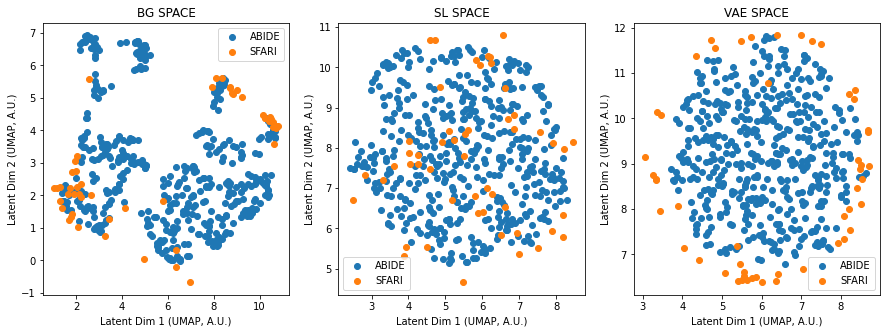

In [7]:
plt.figure(figsize=(15,5))
embedded_data = embed
plt.subplot(1,3,1)
plt.scatter(embedded_data['bg_space_abide'][:,0],embedded_data['bg_space_abide'][:,1])
plt.scatter(embedded_data['bg_space_sfari'][:,0],embedded_data['bg_space_sfari'][:,1])
#plt.scatter(bg_space_sfari[:,0],bg_space_sfari[:,1])
plt.legend(['ABIDE','SFARI']);
plt.title('BG SPACE')
plt.xlabel('Latent Dim 1 (UMAP, A.U.)')
plt.ylabel('Latent Dim 2 (UMAP, A.U.)')

plt.subplot(1,3,2)
plt.scatter(embedded_data['sl_space_abide'][:,0],embedded_data['sl_space_abide'][:,1])
plt.scatter(embedded_data['sl_space_sfari'][:,0],embedded_data['sl_space_sfari'][:,1])
#plt.scatter(sl_space_sfari[:,0],sl_space_sfari[:,1])
plt.legend(['ABIDE','SFARI']);
plt.title('SL SPACE')
plt.xlabel('Latent Dim 1 (UMAP, A.U.)')
plt.ylabel('Latent Dim 2 (UMAP, A.U.)')

plt.subplot(1,3,3)
plt.scatter(embedded_data['vae_space_abide'][:,0],embedded_data['vae_space_abide'][:,1])
plt.scatter(embedded_data['vae_space_sfari'][:,0],embedded_data['vae_space_sfari'][:,1])
#plt.scatter(vae_space_sfari[:,0],vae_space_sfari[:,1])
plt.legend(['ABIDE','SFARI']);
plt.title('VAE SPACE')
plt.xlabel('Latent Dim 1 (UMAP, A.U.)')
plt.ylabel('Latent Dim 2 (UMAP, A.U.)')

#plt.savefig('/mmfs1/data/aglinska/figures/spaces_abide_sfari.png',dpi=300)

In [8]:
embed.keys()

dict_keys(['embedding_bg', 'embedding_sl', 'embedding_vae', 'sfari_embedding_vae', 'sfari_embedding_bg', 'sfari_embedding_sl', 'bg_space_abide', 'sl_space_abide', 'vae_space_abide', 'bg_space_sfari', 'sl_space_sfari', 'vae_space_sfari', 'bg_Sspace_sfari', 'sl_Sspace_sfari', 'vae_Sspace_sfari'])

In [9]:
bg_space_abide = embed['bg_space_abide']
sl_space_abide = embed['sl_space_abide']
vae_space_abide = embed['vae_space_abide']

sl_space_sfari = embed['sl_space_sfari']
bg_space_sfari = embed['bg_space_sfari']
vae_space_sfari = embed['vae_space_sfari']

In [10]:
bg_space_sfari.shape

(51, 2)

In [11]:
sfari = sl_space_sfari
abide = sl_space_abide
sfari.shape

(51, 2)

In [12]:
n_sfari = sfari.shape[0]
n_abide = abide.shape[0]

In [13]:
import scipy
#dist = scipy.spatial.distance.pdist
dist = scipy.spatial.distance.mahalanobis

In [14]:
bg_abide = embed['embedding_bg']
sl_abide = embed['embedding_sl']
vae_abide = embed['embedding_vae']

bg_sfari = embed['sfari_embedding_bg']
sl_sfari = embed['sfari_embedding_sl']
vae_sfari = embed['sfari_embedding_vae']

In [15]:
def mh_dist(sfari_space,abide_space):
    u = sfari_space
    v = abide_space
    vi = np.cov(v.transpose())
    vi = np.linalg.inv(vi)

    md = np.zeros((u.shape[0],v.shape[0]))
    for s in range(md.shape[0]):
        for a in range(md.shape[1]):
            md[s,a] = dist(u[s,:],v[a,:],vi)
    return md

In [16]:
import scipy

In [17]:
ttest = scipy.stats.ttest_rel

In [18]:
bg_mh = mh_dist(bg_sfari,bg_abide) / np.sqrt(16)
sl_mh = mh_dist(sl_sfari,sl_abide) / np.sqrt(16)
vae_mh = mh_dist(vae_sfari,vae_abide) / np.sqrt(32)

In [19]:
bg_mh

array([[1.8402548 , 2.00060205, 1.56073419, ..., 1.6917349 , 1.81549439,
        1.64721692],
       [1.80201356, 1.26170859, 1.58114513, ..., 1.48520752, 1.62405562,
        1.39678001],
       [1.62472768, 1.7616722 , 1.2835715 , ..., 1.14984454, 0.75653186,
        0.84378998],
       ...,
       [1.85619203, 2.02631737, 1.75864983, ..., 1.65844546, 1.90944461,
        1.85052111],
       [1.69045037, 1.44628872, 1.45560961, ..., 1.52901024, 1.57741057,
        1.3130512 ],
       [1.51894475, 1.67644342, 1.37515154, ..., 1.32574089, 1.66879782,
        1.54055841]])

In [20]:
def pretty_ttest(vec1,vec2):
    t,p = ttest(vec1,vec2)
    df = len(vec1)-1
    if p < .001:
        print(f't({df}) = {t:.3f}, p < .001')
    else:
        print(f't({df}) = {t:.3f}, p = {p:.3f}')

In [21]:
pretty_ttest(vae_mh.mean(axis=1),sl_mh.mean(axis=1))

t(50) = 10.161, p < .001


In [22]:
pretty_ttest(vae_mh.mean(axis=1),sl_mh.mean(axis=1))

t(50) = 10.161, p < .001


In [23]:
ys = [bg_mh.mean(axis=1).mean(axis=0),sl_mh.mean(axis=1).mean(axis=0),vae_mh.mean(axis=1).mean(axis=0)]
se = [bg_mh.mean(axis=1).std(axis=0),sl_mh.mean(axis=1).std(axis=0),vae_mh.mean(axis=1).std(axis=0)]
xs = np.arange(3)

Text(0.5, 1.0, 'Mahalanobis Distance between SFARI and ABIDE points')

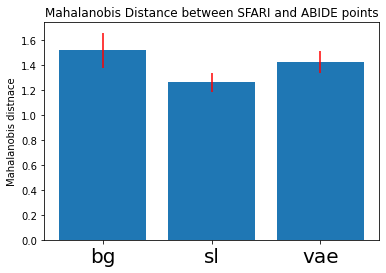

In [24]:
plt.bar(xs,ys);
plt.errorbar(xs,ys,se,fmt='r ');
plt.xticks(xs,labels=['bg','sl','vae'],fontsize=20);
plt.ylabel('Mahalanobis distnace')
plt.title('Mahalanobis Distance between SFARI and ABIDE points')

In [25]:
#dist(np.vstack((sfari[0,:],abide[0,:])),metric='mahalanobis')

Text(0, 0.5, 'BIC - lower is better')

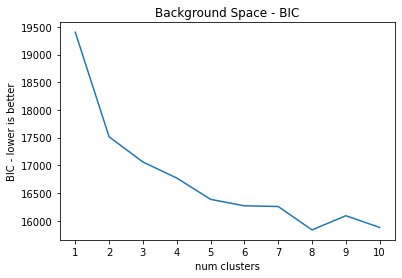

In [156]:
from sklearn.mixture import GaussianMixture as gmm
data_in = bg_abide
bic = list()
for i in range(10):
    g = gmm(n_components=i+1)
    g.fit(data_in)
    bic.append(g.aic(data_in))
    
plt.plot(np.arange(10),bic);
plt.xticks(np.arange(10),labels=np.arange(10)+1);
plt.title('Background Space - BIC')
plt.xlabel('num clusters')
plt.ylabel('BIC - lower is better')

Text(0, 0.5, 'BIC - lower is better')

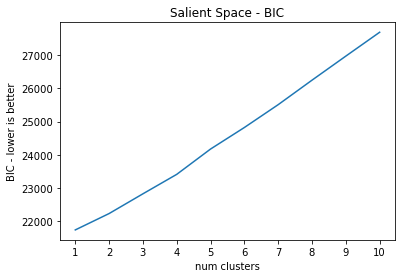

In [118]:
from sklearn.mixture import GaussianMixture as gmm
data_in = sl_abide
bic = list()
n = 10
for i in range(n):
    g = gmm(n_components=i+1)
    g.fit(data_in)
    bic.append(g.bic(data_in))
    
plt.plot(np.arange(n),bic);
plt.xticks(np.arange(n),labels=np.arange(n)+1);
plt.title('Salient Space - BIC')
plt.xlabel('num clusters')
plt.ylabel('BIC - lower is better')

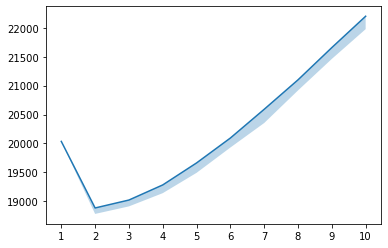

In [122]:
get_bic = lambda data_in : np.array([gmm(n_components=i+1).fit(data_in).bic(data_in) for i in range(10)])
plt.xticks(np.arange(10),labels=np.arange(10)+1);
arr = np.array([get_bic(bg_abide) for _ in range(100)])
xs = np.arange(10)
plt.plot(xs,arr.mean(axis=0))
plt.fill_between(xs,arr.mean(axis=0),arr.min(axis=0),arr.max(axis=0),alpha=.3)

ONE SAMPLE

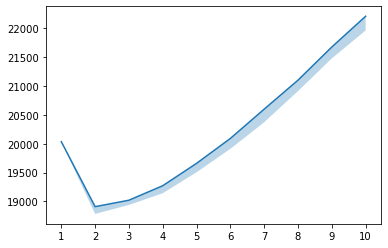

In [38]:
get_bic = lambda data_in : np.array([gmm(n_components=i+1).fit(data_in).bic(data_in) for i in range(10)])
plt.xticks(np.arange(10),labels=np.arange(10)+1);
arr = np.array([get_bic(bg_abide) for _ in range(100)])
xs = np.arange(10)
plt.plot(xs,arr.mean(axis=0))
plt.fill_between(xs,arr.mean(axis=0),arr.min(axis=0),arr.max(axis=0),alpha=.3)

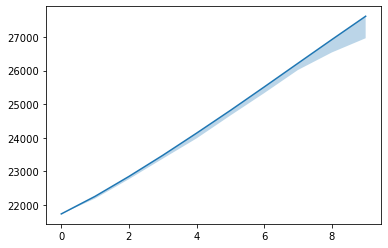

In [30]:
get_bic = lambda data_in : np.array([gmm(n_components=i+1).fit(data_in).bic(data_in) for i in range(10)])
arr = np.array([get_bic(sl_abide) for _ in range(100)])
xs = np.arange(10)
plt.plot(xs,arr.mean(axis=0))
plt.fill_between(xs,arr.mean(axis=0),arr.min(axis=0),arr.max(axis=0),alpha=.3)

In [54]:
pwd

'/mmfs1/data/aglinska/BC-MRI-AE'

DIFF SAMPLES

In [76]:
#import pickle
data = np.load('./Data/latent_vecs3.npz')
df = pd.read_csv('./Data/ABIDE_legend_S982.csv')
list(data.keys())

['salient_vec_abide',
 'background_vec_abide',
 'vae_vec_abide',
 'salient_vec_sfari',
 'background_vec_sfari',
 'vae_vec_sfari']

In [64]:
patients = df['DxGroup'].values==1

CPU times: user 12.5 s, sys: 77.3 ms, total: 12.6 s
Wall time: 9.44 s


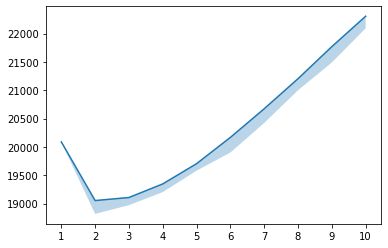

In [92]:
%%time
bg_space = data['background_vec_abide'][3,:,:][patients,:]
n = 10
get_bic = lambda data_in : np.array([gmm(n_components=i+1).fit(data_in).bic(data_in) for i in range(n)])
arr = np.array([get_bic(bg_space) for _ in range(50)])
xs = np.arange(n)
plt.plot(xs,arr.mean(axis=0))
plt.fill_between(xs,arr.mean(axis=0),arr.min(axis=0),arr.max(axis=0),alpha=.3)
plt.xticks(xs,labels=xs+1)

CPU times: user 17.2 s, sys: 90.9 ms, total: 17.3 s
Wall time: 14 s


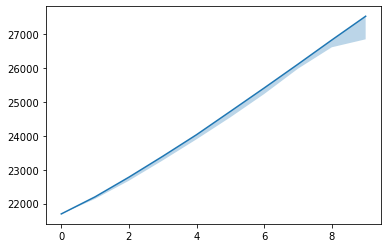

In [91]:
%%time
sl_space = data['salient_vec_abide'][5,:,:][patients,:]
n = 10
get_bic = lambda data_in : np.array([gmm(n_components=i+1).fit(data_in).bic(data_in) for i in range(n)])
arr = np.array([get_bic(sl_space) for _ in range(50)])
xs = np.arange(n)
plt.plot(xs,arr.mean(axis=0))
plt.fill_between(xs,arr.mean(axis=0),arr.min(axis=0),arr.max(axis=0),alpha=.3)
plt.xticks(xs,labels=xs+1)

In [103]:
from tqdm import tqdm

In [104]:
n = 10
i = 10
rep = 5
arr = np.zeros((i,n,rep))

for ii in tqdm(range(i)):
    for jj in range(rep):
        arr[ii,:,jj] = get_bic(data['background_vec_abide'][0,:,:][patients,:])
        
plt.plot(arr.mean(axis=2).transpose());

100%|██████████| 10/10 [00:09<00:00,  1.06it/s]


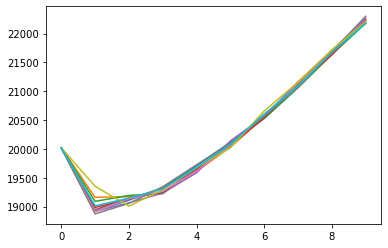

In [109]:
plt.plot(arr.mean(axis=2).transpose());

In [133]:
list(data.keys())

['salient_vec_abide',
 'background_vec_abide',
 'vae_vec_abide',
 'salient_vec_sfari',
 'background_vec_sfari',
 'vae_vec_sfari']

In [137]:
data['salient_vec_sfari'].shape

(10, 121, 16)

In [143]:
dfs = pd.read_csv('./Data/sfari_legend_S121.csv')

In [148]:
cnvs = np.array([v in ['16p-deletion','16p-duplication'] for v in dfs['family_type'].values])

(521, 16)

100%|██████████| 10/10 [00:16<00:00,  1.64s/it]


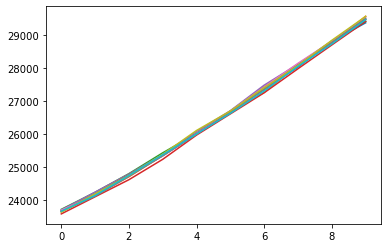

In [160]:
n = 10
i = 10
rep = 5
arr = np.zeros((i,n,rep))

for ii in tqdm(range(i)):
    for jj in range(rep):
        mat = np.vstack((data['salient_vec_sfari'][ii,:,:][cnvs,:],data['salient_vec_abide'][ii,:,:][patients,:]))
        arr[ii,:,jj] = get_bic(mat)
        
plt.plot(arr.mean(axis=2).transpose());

100%|██████████| 10/10 [00:10<00:00,  1.06s/it]


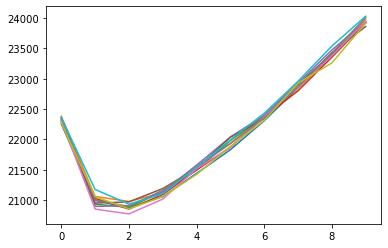

In [161]:
n = 10
i = 10
rep = 5
arr = np.zeros((i,n,rep))

for ii in tqdm(range(i)):
    for jj in range(rep):
        mat = np.vstack((data['background_vec_sfari'][ii,:,:][cnvs,:],data['background_vec_abide'][ii,:,:][patients,:]))
        arr[ii,:,jj] = get_bic(mat)
        
plt.plot(arr.mean(axis=2).transpose());

100%|██████████| 10/10 [00:47<00:00,  4.75s/it]


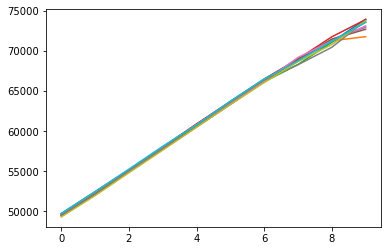

In [162]:
n = 10
i = 10
rep = 5
arr = np.zeros((i,n,rep))

for ii in tqdm(range(i)):
    for jj in range(rep):
        mat = np.vstack((data['vae_vec_sfari'][ii,:,:][cnvs,:],data['vae_vec_abide'][ii,:,:][patients,:]))
        arr[ii,:,jj] = get_bic(mat)
        
plt.plot(arr.mean(axis=2).transpose());

100%|██████████| 10/10 [00:17<00:00,  1.77s/it]


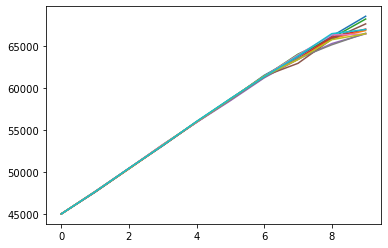

In [131]:
n = 10
i = 10
rep = 5
arr = np.zeros((i,n,rep))

for ii in tqdm(range(i)):
    for jj in range(rep):
        arr[ii,:,jj] = get_bic(data['vae_vec_abide'][0,:,:][patients,:])
        
plt.plot(arr.mean(axis=2).transpose());